In [36]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tflearn
import tensorflow as tf
from PIL import Image
%matplotlib inline
#for writing text files
import glob
import os     
import random 
#reading images from a text file
from tflearn.data_utils import image_preloader
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

In [37]:
IMAGE_FOLDER = 'C:/Iris_Prediction_Augment/train/'
TRAIN_DATA = 'C:/Iris_Prediction_Augment/train/training_data.txt'
TEST_DATA = 'C:/Iris_Prediction_Augment/train/test_data.txt'
VALIDATION_DATA = 'C:/Iris_Prediction_Augment/train/validation_data.txt'
train_proportion=0.7
test_proportion=0.2
validation_proportion=0.1

In [38]:
#read the image directories
filenames_image = os.listdir(IMAGE_FOLDER)
#shuffling the data is important otherwise the model will be fed with a single class data for a long time and 
#network will not learn properly
random.shuffle(filenames_image)
print(filenames_image)

['rith.40.png', 'rith.4.png', 'validation_data.txt', 'rith.27.png', 'training_data.txt', 'left.19.png', 'left.37.png', 'rith.19.png', 'rith.20.png', 'left.30.png', 'left.47.png', 'left.15.png', 'left.32.png', 'rith.11.png', 'rith.38.png', 'left.12.png', 'rith.29.png', 'rith.37.png', 'left.34.png', 'rith.14.png', 'left.49.png', 'rith.17.png', 'left.23.png', 'left.46.png', 'rith.12.png', 'rith.30.png', 'left.20.png', 'left.9.png', 'rith.36.png', 'rith.18.png', 'rith.15.png', 'rith.47.png', 'rith.46.png', 'left.14.png', 'left.7.png', 'rith.2.png', 'left.38.png', 'left.35.png', 'left.42.png', 'rith.23.png', 'left.25.png', 'rith.45.png', 'left.41.png', 'left.11.png', 'left.43.png', 'rith.48.png', 'rith.32.png', 'left.21.png', 'rith.43.png', 'left.18.png', 'left.29.png', 'left.31.png', 'left.45.png', 'left.50.png', 'left.3.png', 'left.1.png', 'rith.42.png', 'left.44.png', 'rith.9.png', 'rith.16.png', 'rith.33.png', 'rith.28.png', 'rith.7.png', 'left.17.png', 'left.28.png', 'rith.34.png', 'ri

In [39]:
#total number of images
total=len(filenames_image)
##  *****training data******** 
fr = open(TRAIN_DATA, 'w')
train_files=filenames_image[0: int(train_proportion*total)]
for filename in train_files:
    if filename[0:4] == 'left':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:4] == 'rith':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')

fr.close()
##  *****testing data******** 
fr = open(TEST_DATA, 'w')
test_files=filenames_image[int(math.ceil(train_proportion*total)):int(math.ceil((train_proportion+test_proportion)*total))]
for filename in test_files:
    if filename[0:4] == 'left':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:4] == 'rith':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')
fr.close()

##  *****validation data******** 
fr = open(VALIDATION_DATA, 'w')
valid_files=filenames_image[int(math.ceil((train_proportion+test_proportion)*total)):total]
for filename in valid_files:
    if filename[0:4] == 'left':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:4] == 'rith':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')
fr.close()

In [40]:
#Importing data
X_train, Y_train = image_preloader(TRAIN_DATA, image_shape=(56,56),mode='file', categorical_labels=True,normalize=True)
X_test, Y_test = image_preloader(TEST_DATA, image_shape=(56,56),mode='file', categorical_labels=True,normalize=True)
X_val, Y_val = image_preloader(VALIDATION_DATA, image_shape=(56,56),mode='file', categorical_labels=True,normalize=True)


In [41]:
print ("Dataset")
print ("Number of training images {}".format(len(X_train)))
print ("Number of testing images {}".format(len(X_test)))
print ("Number of validation images {}".format(len(X_val)))
print ("Shape of an image {}" .format(X_train[1].shape))
print ("Shape of label:{} ,number of classes: {}".format(Y_train[1].shape,len(Y_train[1])))

Dataset
Number of training images 70
Number of testing images 19
Number of validation images 10
Shape of an image (56, 56, 3)
Shape of label:(2,) ,number of classes: 2


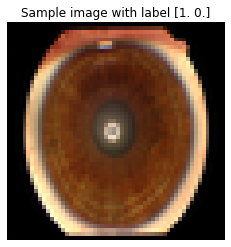

In [8]:
#Sample Image 
plt.imshow(X_train[1])
plt.axis('off')
plt.title('Sample image with label {}'.format(Y_train[1]))
plt.show()

In [9]:
#input image
x=tf.placeholder(tf.float32,shape=[None,56,56,3] , name='input_image') 
#input class
y_=tf.placeholder(tf.float32,shape=[None, 2] , name='input_class')

In [10]:
input_layer=x
#convolutional layer 1 --convolution+RELU activation
conv_layer1=tflearn.layers.conv.conv_2d(input_layer, nb_filter=64, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu', regularizer="L2", name='conv_layer_1')

#2x2 max pooling layer
out_layer1=tflearn.layers.conv.max_pool_2d(conv_layer1, 2)


#second convolutional layer 
conv_layer2=tflearn.layers.conv.conv_2d(out_layer1, nb_filter=128, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer2=tflearn.layers.conv.max_pool_2d(conv_layer2, 2)
# third convolutional layer
conv_layer3=tflearn.layers.conv.conv_2d(out_layer2, nb_filter=128, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer3=tflearn.layers.conv.max_pool_2d(conv_layer3, 2)

#fully connected layer1
fcl= tflearn.layers.core.fully_connected(out_layer3, 4096, activation='relu' , name='FCL-1')
fcl_dropout_1 = tflearn.layers.core.dropout(fcl, 0.8)
#fully connected layer2
fc2= tflearn.layers.core.fully_connected(fcl_dropout_1, 4096, activation='relu' , name='FCL-2')
fcl_dropout_2 = tflearn.layers.core.dropout(fc2, 0.8)
#softmax layer output
y_predicted = tflearn.layers.core.fully_connected(fcl_dropout_2, 2, activation='softmax', name='output')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
#loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_predicted+np.exp(-10)), reduction_indices=[1]))
#optimiser -
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y_predicted,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
# session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.global_variables_initializer()
sess.run(init)
saver = tf.train.Saver()
save_path="C:/Iris_Prediction_Augment/train/mark3.ckpt"

In [13]:
# grabbing the default graph
g = tf.get_default_graph()

# every operations in our graph
[op.name for op in g.get_operations()]

['is_training/Initializer/Const',
 'is_training',
 'is_training/Assign',
 'is_training/read',
 'Assign/value',
 'Assign',
 'Assign_1/value',
 'Assign_1',
 'input_image',
 'input_class',
 'conv_layer_1/W/Initializer/random_uniform/shape',
 'conv_layer_1/W/Initializer/random_uniform/min',
 'conv_layer_1/W/Initializer/random_uniform/max',
 'conv_layer_1/W/Initializer/random_uniform/RandomUniform',
 'conv_layer_1/W/Initializer/random_uniform/sub',
 'conv_layer_1/W/Initializer/random_uniform/mul',
 'conv_layer_1/W/Initializer/random_uniform',
 'conv_layer_1/W',
 'conv_layer_1/W/Assign',
 'conv_layer_1/W/read',
 'conv_layer_1/W/Regularizer/L2Loss',
 'conv_layer_1/W/Regularizer/L2-Loss/y',
 'conv_layer_1/W/Regularizer/L2-Loss',
 'conv_layer_1/b/Initializer/Const',
 'conv_layer_1/b',
 'conv_layer_1/b/Assign',
 'conv_layer_1/b/read',
 'conv_layer_1/Conv2D',
 'conv_layer_1/BiasAdd',
 'conv_layer_1/Relu',
 'MaxPool2D/MaxPool',
 'conv_layer_2/W/Initializer/random_uniform/shape',
 'conv_layer_2/W/I

In [14]:
epoch=25 # run for more iterations according your hardware's power
#change batch size according to your hardware's power. For GPU's use batch size in powers of 2 like 2,4,8,16...
batch_size=20 
no_itr_per_epoch=len(X_train)//batch_size

In [15]:
no_itr_per_epoch
n_test=len(X_test) #number of test samples
n_val=len(X_val)

In [16]:
# Now iterate over our dataset n_epoch times
for iteration in range(epoch):
    print("Iteration no: {} ".format(iteration))
    
    previous_batch=0
    # Do our mini batches:
    for i in range(no_itr_per_epoch):
        current_batch=previous_batch+batch_size
        x_input=X_train[previous_batch:current_batch]
        x_images=np.reshape(x_input,[batch_size,56,56,3])
        
        y_input=Y_train[previous_batch:current_batch]
        y_label=np.reshape(y_input,[batch_size,2])
        previous_batch=previous_batch+batch_size
        
        _,loss=sess.run([train_step, cross_entropy], feed_dict={x: x_images,y_: y_label})
        if i % 100==0 :
            print ("Training loss : {}" .format(loss))
            
   
        
    x_test_images=np.reshape(X_test[0:n_test],[n_test,56,56,3])
    y_test_labels=np.reshape(Y_test[0:n_test],[n_test,2])
    Accuracy_test=sess.run(accuracy,
                           feed_dict={
                        x: x_test_images ,
                        y_: y_test_labels
                      })
    Accuracy_test=round(Accuracy_test*100,2)
    
    x_val_images=np.reshape(X_val[0:n_val],[n_val,56,56,3])
    y_val_labels=np.reshape(Y_val[0:n_val],[n_val,2])
    Accuracy_val=sess.run(accuracy,
                           feed_dict={
                        x: x_val_images ,
                        y_: y_val_labels
                      })    
    Accuracy_val=round(Accuracy_val*100,2)
    print("Accuracy ::  Test_set {} % , Validation_set {} % " .format(Accuracy_test,Accuracy_val))

Iteration no: 0 
Training loss : 0.6533252000808716
Accuracy ::  Test_set 81.82 % , Validation_set 76.32 % 
Iteration no: 1 
Training loss : 0.6175698041915894
Accuracy ::  Test_set 93.51 % , Validation_set 86.84 % 
Iteration no: 2 
Training loss : 0.39320650696754456
Accuracy ::  Test_set 79.22 % , Validation_set 81.58 % 
Iteration no: 3 
Training loss : 0.48988109827041626
Accuracy ::  Test_set 90.91 % , Validation_set 86.84 % 
Iteration no: 4 
Training loss : 0.11372174322605133
Accuracy ::  Test_set 96.1 % , Validation_set 97.37 % 
Iteration no: 5 
Training loss : 0.025580311194062233
Accuracy ::  Test_set 96.1 % , Validation_set 97.37 % 
Iteration no: 6 
Training loss : 0.009120641276240349
Accuracy ::  Test_set 98.7 % , Validation_set 97.37 % 
Iteration no: 7 
Training loss : 0.006342326756566763
Accuracy ::  Test_set 98.7 % , Validation_set 97.37 % 
Iteration no: 8 
Training loss : 0.0038136045914143324
Accuracy ::  Test_set 98.7 % , Validation_set 97.37 % 
Iteration no: 9 
Trai

In [17]:
def process_img(img):
        img=img.resize((56, 56), Image.ANTIALIAS) #resize the image
        img = np.array(img)
        img=img/np.max(img).astype(float) 
        img=np.reshape(img, [1,56,56,3])
        return img

In [22]:
#test your own images 
for j in range (0,int((format(len(filenames_image))))):
    test_image=Image.open(IMAGE_FOLDER+filenames_image[j])
    test_image= process_img(test_image)
    predicted_array= sess.run(y_predicted, feed_dict={x: test_image})
    predicted_class= np.argmax(predicted_array)
    if predicted_class==0:
        print ("It is a Left IRIS")  
    else :
        print ("It is a Right IRIS")

It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Left IRIS
It is a Right IRIS
It is a Right IRIS
It is a Right IRIS
It is a Right IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Right IRIS
It is a Right IRIS
It is a Left IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Right IRIS
It is a Right IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a Right IRIS
It is a Left IRIS
It is a L

UnidentifiedImageError: cannot identify image file 'C:/Iris_Prediction_Augment/train/out.docx'